In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [333]:
df = pd.read_csv('data_correlation_gone_norm.csv',index_col = 0)

In [334]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [335]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [336]:
tomodel = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Years_last_renovation','basement','grade','bedbath']

In [337]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [338]:
X = df[tomodel]
y = df['price']

In [339]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          2.853e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:31:26   Log-Likelihood:                     -2.4988e+05
No. Observations:               18704   AIC:                                  4.998e+05
Df Residuals:                   18695   BIC:                                  4.998e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.933e+04   1550.709    -12.468      0.000   -2.24e+04   -1.63e+04
bathrooms              1.109e+04   1965.292      5.642      0.000    7236.319    1.49e+04
sqft_living            1.263e+05   2124.469     59.431      0.000    1.22e+05     1.3e+05
sqft_lot               3.292e+04   1474.635     22.327      0.000       3e+04    3.58e+04
distance_from_a_city  -1.399e+05   1295.429   -108.030      0.000   -1.42e+05   -1.37e+05
Years_last_renovation  9921.0580   1567.846      6.328      0.000    6847.938     1.3e+04
basement              -2.522e+04   2506.009    -10.062      0.000   -3.01e+04   -2.03e+04
grade                  6.782e+04    204.415    331.798      0.000    6.74e+04    6.82e+04
bedbath                2.013e+04   1012.231     19.889      0.000    1.81e+04    2.21e+04
==============================================================================
Omnibus:                     6024.826   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34790.768
Skew:                           1.430   Prob(JB):                         0.00
Kurtosis:                       9.038   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [340]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          2.853e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:31:26   Log-Likelihood:                     -2.4988e+05
No. Observations:               18704   AIC:                                  4.998e+05
Df Residuals:                   18695   BIC:                                  4.998e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.933e+04   1550.709    -12.468      0.000   -2.24e+04   -1.63e+04
bathrooms              1.109e+04   1965.292      5.642      0.000    7236.319    1.49e+04
sqft_living            1.263e+05   2124.469     59.431      0.000    1.22e+05     1.3e+05
sqft_lot               3.292e+04   1474.635     22.327      0.000       3e+04    3.58e+04
distance_from_a_city  -1.399e+05   1295.429   -108.030      0.000   -1.42e+05   -1.37e+05
Years_last_renovation  9921.0580   1567.846      6.328      0.000    6847.938     1.3e+04
basement              -2.522e+04   2506.009    -10.062      0.000   -3.01e+04   -2.03e+04
grade                  6.782e+04    204.415    331.798      0.000    6.74e+04    6.82e+04
bedbath                2.013e+04   1012.231     19.889      0.000    1.81e+04    2.21e+04
==============================================================================
Omnibus:                     6024.826   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34790.768
Skew:                           1.430   Prob(JB):                         0.00
Kurtosis:                       9.038   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

9 9
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.933e+04,1550.709,-12.468,0.0,-2.24e+04,-1.63e+04
bathrooms,1.109e+04,1965.292,5.642,0.0,7236.319,1.49e+04
sqft_living,1.263e+05,2124.469,59.431,0.0,1.22e+05,1.3e+05
sqft_lot,3.292e+04,1474.635,22.327,0.0,3e+04,3.58e+04
distance_from_a_city,-1.399e+05,1295.429,-108.030,0.0,-1.42e+05,-1.37e+05


In [342]:
X = df[x_cols]
y= df['price']

In [343]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          2.853e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:31:27   Log-Likelihood:                     -2.4988e+05
No. Observations:               18704   AIC:                                  4.998e+05
Df Residuals:                   18695   BIC:                                  4.998e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.933e+04   1550.709    -12.468      0.000   -2.24e+04   -1.63e+04
bathrooms              1.109e+04   1965.292      5.642      0.000    7236.319    1.49e+04
sqft_living            1.263e+05   2124.469     59.431      0.000    1.22e+05     1.3e+05
sqft_lot               3.292e+04   1474.635     22.327      0.000       3e+04    3.58e+04
distance_from_a_city  -1.399e+05   1295.429   -108.030      0.000   -1.42e+05   -1.37e+05
Years_last_renovation  9921.0580   1567.846      6.328      0.000    6847.938     1.3e+04
basement              -2.522e+04   2506.009    -10.062      0.000   -3.01e+04   -2.03e+04
grade                  6.782e+04    204.415    331.798      0.000    6.74e+04    6.82e+04
bedbath                2.013e+04   1012.231     19.889      0.000    1.81e+04    2.21e+04
==============================================================================
Omnibus:                     6024.826   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34790.768
Skew:                           1.430   Prob(JB):                         0.00
Kurtosis:                       9.038   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.9110281158353128),
 ('bathrooms', 3.0694484953319012),
 ('sqft_living', 3.5867974084116625),
 ('sqft_lot', 1.728125288229199),
 ('distance_from_a_city', 1.3336240493279212),
 ('Years_last_renovation', 1.953497003902759),
 ('basement', 1.9063453976573228),
 ('grade', 1.9680423294649252),
 ('bedbath', 1.3799911406386545)]

In [345]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

9 9


In [346]:
X = df[x_cols]
y= df['price']

In [347]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          2.853e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:31:28   Log-Likelihood:                     -2.4988e+05
No. Observations:               18704   AIC:                                  4.998e+05
Df Residuals:                   18695   BIC:                                  4.998e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.933e+04   1550.709    -12.468      0.000   -2.24e+04   -1.63e+04
bathrooms              1.109e+04   1965.292      5.642      0.000    7236.319    1.49e+04
sqft_living            1.263e+05   2124.469     59.431      0.000    1.22e+05     1.3e+05
sqft_lot               3.292e+04   1474.635     22.327      0.000       3e+04    3.58e+04
distance_from_a_city  -1.399e+05   1295.429   -108.030      0.000   -1.42e+05   -1.37e+05
Years_last_renovation  9921.0580   1567.846      6.328      0.000    6847.938     1.3e+04
basement              -2.522e+04   2506.009    -10.062      0.000   -3.01e+04   -2.03e+04
grade                  6.782e+04    204.415    331.798      0.000    6.74e+04    6.82e+04
bedbath                2.013e+04   1012.231     19.889      0.000    1.81e+04    2.21e+04
==============================================================================
Omnibus:                     6024.826   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34790.768
Skew:                           1.430   Prob(JB):                         0.00
Kurtosis:                       9.038   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.9110281158353128),
 ('bathrooms', 3.0694484953319012),
 ('sqft_living', 3.5867974084116625),
 ('sqft_lot', 1.728125288229199),
 ('distance_from_a_city', 1.3336240493279212),
 ('Years_last_renovation', 1.953497003902759),
 ('basement', 1.9063453976573228),
 ('grade', 1.9680423294649252),
 ('bedbath', 1.3799911406386545)]

In [349]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [350]:
residuals = model.resid

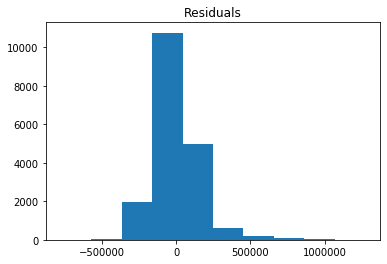

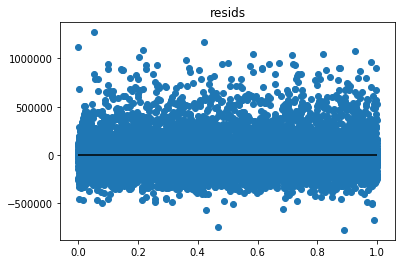

In [351]:
plot_residuals(residuals)

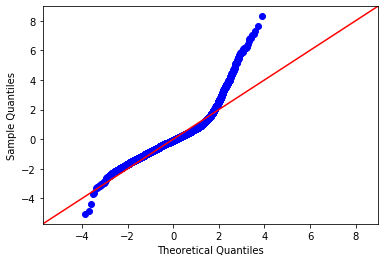

In [352]:
fig = sm.graphics.qqplot(residuals, dist=scs.norm, line='45', fit=True)


# Build Mode in Sklearn

In [353]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [355]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [356]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [357]:
def get_score(model ,X_train, y_train):
    y_train_preds = model.predict(X_train)

In [358]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

0.7069209020830306

In [359]:
testing_score = ols.score(X_test, y_test)
testing_score

0.7099957508524887

In [360]:
cv_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
# cv breaks your data into that many equal pieces 
cv_scores

-107991.51917622183

In [361]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    print(f"train score = {train_score}")
    print(f"test score = {test_score}")
    return ols

In [362]:
make_ols_sklearn(X, y)

train score = 0.7071497301970082
test score = 0.7091180017206308


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [363]:
make_ols_sklearn(X, y)

train score = 0.7072382456445669
test score = 0.7081327656733046


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [365]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

In [366]:
import seaborn as sns

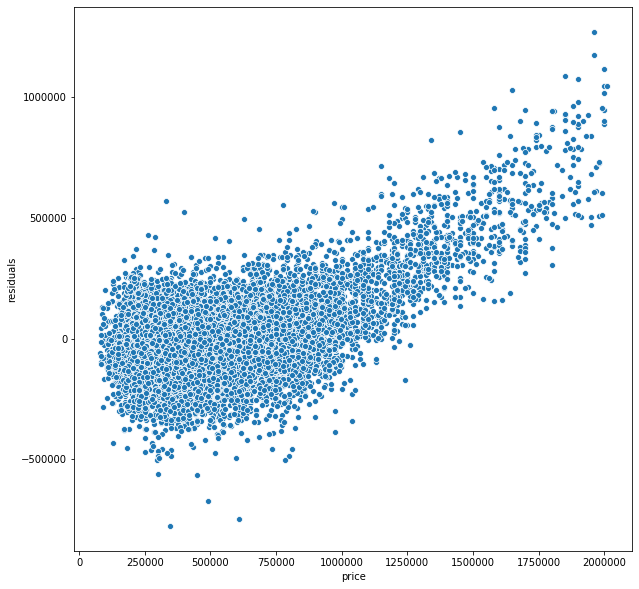

In [367]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)